In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_rows', 120)

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fifa_df = pd.read_csv('../input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv', low_memory=False)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv
/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv


In [2]:
fifa_df = fifa_df.drop(columns=['photoUrl'])
fifa_df = fifa_df.drop(columns=['playerUrl'])
fifa_df = fifa_df.rename(columns={'Weight': 'Weight: lbs'})

In [3]:
fifa_df['Joined'] = pd.to_datetime(fifa_df['Joined'])

In [4]:
fifa_df['day'] = fifa_df['Joined'].dt.day
fifa_df['month'] = fifa_df['Joined'].dt.month
fifa_df['year'] = fifa_df['Joined'].dt.year

In [5]:
fifa_df['Hits'] = fifa_df['Hits'].str.replace('\n', ' ')
fifa_df['Team & Contract'] = fifa_df['Team & Contract'].str.replace('\n', ' ')
fifa_df['SM'] = fifa_df['SM'].str.replace('★', ' ')

In [6]:
fifa_df[['Team', 'Contract']] = fifa_df['Team & Contract'].str.split(' & ', expand=True)

In [7]:
fifa_df['Weight: lbs'] = fifa_df['Weight: lbs'].str.replace('lbs', ' ')
fifa_df['Weight: lbs']
fifa_df['Weight: lbs'] = fifa_df['Weight: lbs'].astype(str).astype(int)

In [8]:
#fifa_df['Wage'] = fifa_df['Wage'].str.replace('€', ' ')
#fifa_df['Wage'] = fifa_df['Wage'].str.replace('K', ' ')
#fifa_df['Wage'] = fifa_df['Wage'].astype(str).astype(int)

In [9]:
#fifa_df['Value'] = fifa_df['Value'].str.replace('€', ' ')
#fifa_df['Value'] = fifa_df['Value'].str.replace('M', ' ')
#fifa_df['Value'] = fifa_df['Value'].str.replace('K', ' ')
#fifa_df['Value'] = fifa_df['Value'].astype(float).astype(int)

In [10]:
def value_setting(value): 
    if isinstance(value, str):
        if value.find("M") != -1:
            return int(float(value.replace("M", "").replace('€', '')) * 1000000)
        elif value.find("K") != -1: 
            return int(value.replace("K", "").replace("€", "")) * 1000 
    else:
        return int(value)

In [11]:
fifa_df['Value'] = fifa_df['Value'].apply(value_setting)
fifa_df['Wage'] = fifa_df['Wage'].apply(value_setting)
fifa_df['Release Clause'] = fifa_df['Release Clause'].apply(value_setting)

In [12]:
fifa_df[['Wage', 'Value','Release Clause']]

,Wage,Value,Release Clause
0,560000.0,67500000.0,138400000.0
1,220000.0,46000000.0,75900000.0
2,125000.0,75000000.0,159400000.0
3,370000.0,87000000.0,161000000.0
4,270000.0,90000000.0,166500000.0
...,...,...,...
18974,1000.0,35000.0,57000.0
18975,NaN,60000.0,165000.0
18976,1000.0,40000.0,70000.0
18977,NaN,60000.0,165000.0


<Axes: xlabel='Value', ylabel='Wage'>

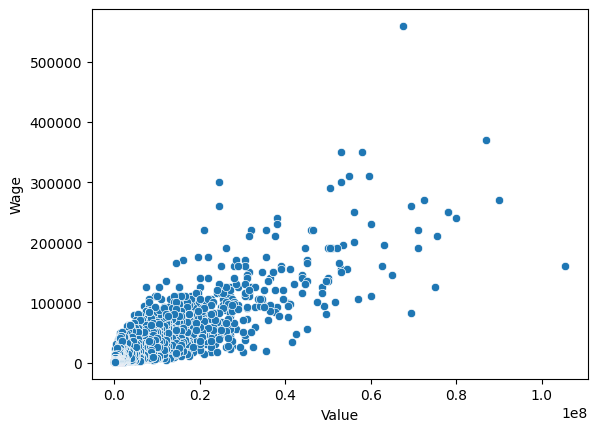

In [13]:
sns.scatterplot(x=fifa_df['Value'], y=fifa_df['Wage'])

<Axes: xlabel='Value', ylabel='Wage'>

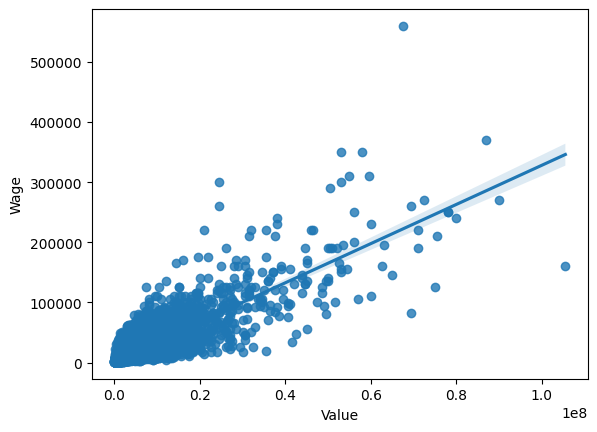

In [14]:
sns.regplot(x=fifa_df['Value'], y=fifa_df['Wage'])